# Gjennomsnittlig vekstfart, momentan vekstfart og numerisk derivasjon i Python

Den deriverte av en funksjon f for et tidspunkt t gir oss "farten" til funksjonen i det tidspunktet. Hva betyr det egentlig? Og hvordan finner vi farten?

La oss se på et eksempel. La oss si at vi lurer på hvor raskt jeg løper? Hvordan kan vi gå frem?


<img src="bilder/athletes-running-on-track-and-field-oval-in-grayscale-34514.jpg" width="600px">


# Gjennomsnittsfart er strekningen jeg løpte delt på tiden det tok



<img src="bilder/fart_illustrasjon.png">


Kanskje har du allerede målt fart før og har en ide om hvordan det skal gjøres: Vi tar fram stoppeklokka og målebåndet. Så måler vi lengden på strekningen jeg løper og hvor lang tid jeg bruker. Gjennomsnittsfarten min er da strekningen delt på tid. For å regne ut dette kan vi skrive et lite program:

In [1]:
startposisjon = 0 #m unna huset mitt
sluttposisjon = 30 #m unna huset mitt

starttid = 0 #s siden start
slutttid = 6 #s siden start

ds = sluttposisjon - startposisjon
dt = slutttid - starttid

fart = ds/dt
print(f'Farten er {fart} m/s')

Farten er 5.0 m/s


I programmet over kan du nå putte inn hvilken som helst startposisjon, sluttposisjon, starttid og sluttid og få ut gjennomsnittfarten

# Gjør vi det om til en funksjon, kan vi interaktivt regne farten for forskjellige målinger

In [2]:
# Kode for gjennomsnittfart her
from ipywidgets import interact

def finn_fart(startposisjon, sluttposisjon, starttid, slutttid):
    ds = sluttposisjon - startposisjon
    dt = slutttid - starttid
    
    if dt == 0:
        print('Det å dele på 0 er tull!')
    else:
        fart = ds/dt
        print(f'Fart: {fart} m/s')

    
interact(
    finn_fart, 
    startposisjon=(0, 60), 
    sluttposisjon=(0, 60), 
    starttid=(0, 20), 
    slutttid=(0, 20)
)

interactive(children=(IntSlider(value=30, description='startposisjon', max=60), IntSlider(value=30, descriptio…

<function __main__.finn_fart(startposisjon, sluttposisjon, starttid, slutttid)>

# Hvis vi vil vite hvordan farten endrer seg underveis trenger vi flere målepunkter

Men hva om vi ikke nøyer oss med gjennomsnittfarten. Hva om vi vil vite hva farten min er underveis i løpeturen? Hva gjør vi da?

Da må vi rett og slett ta flere mål. La oss si at jeg løper i **tyve sekunder** og noen står med stoppeklokke og måler hvor langt jeg har løpt for **hvert sekund**. For å lage måletidspunktene i Python kan i bruke arange i pylab 

In [3]:
from pylab import *

måletidspunkt = arange(0, 21, 1)
print(måletidspunkt)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


### Oppgave 1 a) Tolke kode
Se på koden i cella over og svar på følgende spørsmål:
* Hva gjør hver linje?
* Hva slags effekt har tallene 0, 21 og 1 på koden? Hva vil skje dersom du endrer dem?

Vi trenger også avstanden min på de ulike tidspunktene. La oss si at avstanden jeg har løpt er gitt ved funksjonen
$$ f(t) =\frac{1}{1 + e^{10 - t}}. $$

### Oppgave 1 b) Funksjon for avstand
Lag en funksjon `f(t)` som tar inn et tidspunkt og returnerer avstand gitt av uttrykket over (hint for å regne ut $e^x$ kan du bruke `exp(x)` funksjonen fra `pylab`).

In [4]:
# Fyll inn funksjonen her
def f(t):
    return 1. / (1. + exp(-t+10))

### Oppgave 1c) Finne avstandene på måletidspunktene 
Bruk funksjonen over til å finne måletidspunktene 

In [5]:
# Fyll inn koden 
måledistanser = f(måletidspunkt)
print(måledistanser)

[4.53978687e-05 1.23394576e-04 3.35350130e-04 9.11051194e-04
 2.47262316e-03 6.69285092e-03 1.79862100e-02 4.74258732e-02
 1.19202922e-01 2.68941421e-01 5.00000000e-01 7.31058579e-01
 8.80797078e-01 9.52574127e-01 9.82013790e-01 9.93307149e-01
 9.97527377e-01 9.99088949e-01 9.99664650e-01 9.99876605e-01
 9.99954602e-01]


Nå kan vi plotte løpeturen min med plot funksjonen

### Oppgave 1d) Plotte strekningsmålinene mot tidsmålingene

Fyll inn cella under slik at den bruker `plot` til å tegne et plot av strekningsmålingene mot tidsmålingene

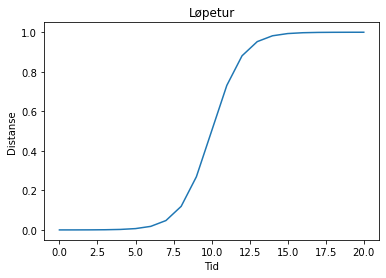

In [6]:
# Din kode her
plot(måletidspunkt, måledistanser)

title('Løpetur')
xlabel('Tid')
ylabel('Distanse')
show()

### Oppgave 1e) Refleksjonsoppgave
Når løpte jeg raskest? Etter 0 sekunder, etter 10 sekunder eller etter 15?

# Del 2: Hva er farten min underveis i turen?

<img src="bilder/stoppeklokker.png" width="600px">


Vi starter med å velge et punkt vi vil finne tiden på, for eksempel $t = 10$s. La oss starte med å vise frem dette punktet med en prikk.

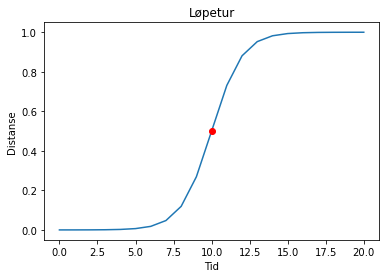

In [7]:
# plott punktet som en rød sirkel
plot(måletidspunkt, måledistanser)

plot(10, f(10), 'ro') # plott punkt

title('Løpetur')
xlabel('Tid')
ylabel('Distanse')
show()

#  Fart er et mål på endring, så vi trenger to tidspunkt

På en måte gir jo ikke det helt mening og snakke om farten for et tidspunkt. Fart er jo endring og for å få endring må vi ha to tidspunkt. Det vi kan gjøre er å se på endring mellom $t = 10$ og neste måling $t = 11$. 

La oss tegne inn endringen i tid inn i plottet vårt. For å gjøre det tegner vi en rett strek fra $t = 10$ til $t = 11$ som ikke endrer seg vertikalt 

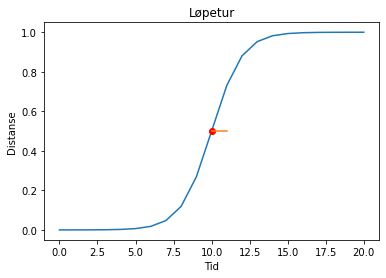

In [8]:
plot(måletidspunkt, måledistanser)

plot(10, f(10), 'ro') # plott punkt
plot([10, 11], [f(10), f(10)]) # plott strek

title('Løpetur')
xlabel('Tid')
ylabel('Distanse')
show()

Videre kan vi tegne inn endringen i distanse som en vertikal strek:

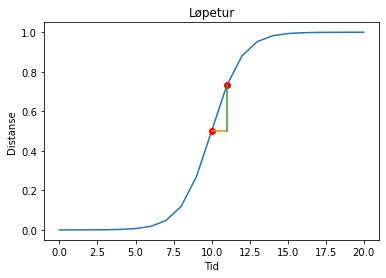

In [9]:
plot(måletidspunkt, måledistanser)

plot(10, f(10), 'ro') # plott punkt
plot(11, f(11), 'ro') # plott punkt
plot([10, 11], [f(10), f(10)]) # plott endring i tid
plot([11, 11], [f(10), f(11)]) # plott endring i strekning

title('Løpetur')
xlabel('Tid')
ylabel('Distanse')
show()

Farten er endringen i strekning delt på endringen i tid. Vi kan se av plottet vårt at endringen i strekning er ganske stor mellom disse tidspunktene. 

Vi kan nå regne ut farten slik vi har gjorde tidligere:

In [10]:
fart = (f(11)-f(10))/(11-10)
print(f'Farten er {fart} m/s')

Farten er 0.2310585786300049 m/s


Hvis vi vil undersøke hvordan farten min endrer seg for forskjellige tidspunkt, må vi gjøre koden vår mer generell. Vi trenger variabler for tidspunktet vi vil se på og for hvor ofte vi måler. La oss kalle dem `t` og `dt`.

Fart: 0.14973849934787742 m/s


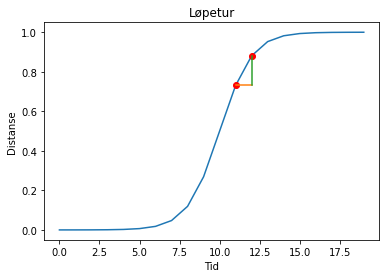

In [11]:
t = 11  # Tidspunktet vi ser på
dt = 1  # Hvor stor er endringen i tid?

måletidspunkt = arange(0, 20, dt)
måledistanser = f(måletidspunkt)
plot(måletidspunkt, måledistanser)

plot(t, f(t), 'ro')
plot(t+dt, f(t+dt), 'ro')

# Plotte endring i tid
plot((t, t+dt), (f(t), f(t)))

# Plotte endring i strekning
plot((t+dt, t+dt), (f(t), f(t+dt)))
ds = f(t+dt) - f(t)

fart = ds/dt
print(f'Fart: {fart} m/s')

# Pynte plottet med merkelapper og tittel
title('Løpetur')
xlabel('Tid')
ylabel('Distanse')

# Hvis frem plottet
show()

Nå kan du prøve å kjøre cellen over med forskjellige verdier av måletidspunkt og se hvordan farten ender seg gjennom løpeturen. Hva er farten etter 2 sekunder? Hva med etter 15 sekunder?

Vi kan nok en gang gjøre programmet om til en funksjon og binde det til en slider

In [12]:
def plot_derivasjon(tidspunkt=10):
    # Gjøre beregninger
    dt = 1
    måletidspunkt = arange(0, 21, dt)
    måledistanser = f(måletidspunkt)

    # Tegne linjene
    plot(måletidspunkt, måledistanser)

    plot((t, t + dt), (f(t), f(t))) # plott endring i tid
    plot((t + dt, t + dt), (f(t), f(t+dt))) # plott endring i strekning

    # Pynte på plottet
    title('Løpetur')
    xlabel('Tid')
    ylabel('Distanse')
    
    # Regne ut farten
    avstands_endring = f(t+dt)-f(t)
    fart = (avstands_endring/(dt))
    print(f'Farten er {fart} m/s')
    
interact(plot_derivasjon, tidspunkt=(0,20))

interactive(children=(IntSlider(value=10, description='tidspunkt', max=20), Output()), _dom_classes=('widget-i…

<function __main__.plot_derivasjon(tidspunkt=10)>

Nå kan vi dra slideren rundt og se på hva som skjer i endringen in tid og endringen i distanse på forskjellige tidspunkt i turen min. Supert! 

"Men!" Tenker du kanskje. "Jeg trodde vi se på momentanfarten. Og det er jo farten i et tidspunkt. Ikke bare endringen mellom to tidspunkter!". Det er sant. Momentanfarten er definert som det vi får når vi lar endringen i tid gå mot null. Vi kan se på det som at målingene skjer oftere og oftere. 

Det vi har over er altså bare en tilnærming til momentanfarten. Hva gjør vi om vi ønsker en bedre tilnærming?. Du har kanskje allerede gjettet at vi må ha tettere målinger. Altså en mindre dt. Enda bedre er det om vi lager en slider for dt også. Så kan vi se hva som skjer når dt blir mindre. 

<center>
    <img src="bilder/pexels-photo-3425443.jpeg" width="200px" style="display: inline" />
    <img src="bilder/athletes-running-on-track-and-field-oval-in-grayscale-34514.jpg" width="400px" style="display: inline">
    
<p style="text-align: center"><strong>Refleksjonsspørsmål:</strong> Hva er farten til løperne på bildet?</p>
</center>

In [13]:
def plot_derivasjon(t=10, dt=1):

    måletidspunkt = arange(0, 20+dt, dt)
    måledistanser = f(måletidspunkt)

    plot(t, f(t), 'ro')
    plot(t+dt, f(t+dt), 'ro')
    plot(måletidspunkt, måledistanser)

    plot((t, t+dt), (f(t), f(t))) # plott endring i tid
    plot((t+dt, t+dt), (f(t), f(t+dt))) # plott endring i strekning
    title('Løpetur')
    xlabel('Tid')
    ylabel('Distanse')
    fart = (f(t + dt)-f(t))/(dt)
    print(f'Farten er {fart} m/s')
    
    show()
    
interact(plot_derivasjon, tidspunkt=(0,20), dt=(0.00000000001, 2., 0.01), readout_format='.4f')

interactive(children=(IntSlider(value=10, description='t', max=30, min=-10), FloatSlider(value=1.0, descriptio…

<function __main__.plot_derivasjon(t=10, dt=1)>

Her ser vi at jo oftere vi "måler", desto bedre oppløsning får plottet vårt. I tillegg vil estimatet vårt på momentanfarten bli mer og mer nøyaktig. 

### OBS:
Hvis vi leker rundt med sliderene ser vi at den gule og grønne linja av og til ikke helt passer med den blå linja. Grunnen til det er at måten vi tegner opp den blå linja er ved å regne ut x og y verdiene til linja på visse punkter og trekke rette streker mellom disse punktene. Det er ikke alltid de punktene vi har regnet ut x og y verdiene til den blå linja er de samme som de vi brukte for å tegne opp den gule og grønne linja, og da kan dette skje. For å demonstrere dette kan du sette `tidspunkt=11` og `dt=0.60`.

# Vi kan regne ut farten for hvert tidspunkt

Det vi har nå er jo en verdi for farten for hvert tidspunkt. Vi har altså en **funksjon** som tar inn tid og spytter ut en fart. La oss nå forsøke å plotte farten som en funksjon av tid. Da må vi regne ut den deriverte for hvert eneste punkt i målingene våre. La oss først finne endringen i posisjon for hvert punkt 

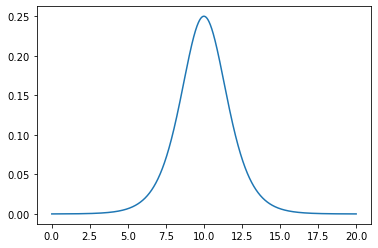

In [14]:
# Kode for å lage plot av farten for hvert tidspunkt her
dt = 0.01

måletidspunkt = arange(0, 20+dt, dt)
måledistanser = f(måletidspunkt)

antall_tidspunkt = len(måledistanser)

fart = zeros(antall_tidspunkt-1)
for t in range(antall_tidspunkt - 1):
    fart[t] = (måledistanser[t+1] - måledistanser[t])/dt
    
plot(måletidspunkt[1:], fart)
show()

Denne figuren stemmer fint med intuisjonen vår fra istad. Til å begynne med er farten lav, så øker frem til vi har løpt i 10 sekund, før den går ned til 0 igjen. I tillegg ser vi at om vi måler avstanden hver hundredel av et sekund, så får vi en veldig glatt kurve. I virkeligheten er det jo vanskelig å måle så raskt, så det kan være interessant å se hvordan denne kurven utvikler seg om vi øker tiden mellom hver måling. Det kan du gjøre ved å endre på `dt` variabelen.

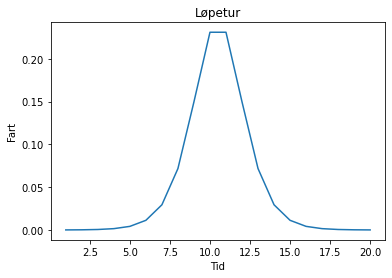

In [15]:
dt = 1
måletidspunkt = arange(0, 21, dt)
måledistanser = f(måletidspunkt)
antall_tidssteg = len(måletidspunkt)

endring_distanse = zeros(antall_tidssteg - 1)
for i in range(antall_tidssteg - 1):
    endring_distanse[i] = måledistanser[i+1] - måledistanser[i] 
fart = endring_distanse/dt

plot(måletidspunkt[1:], fart) # hvorfor hopper vi over første tidspunkt?


title('Løpetur')
xlabel('Tid')
ylabel('Fart')
show()

La oss lage en slider for dt igjen for å se hvordan det ser ut når vi endrer `dt`

## Oppgave 2
Modifiser cellen over til å lage en slider for `dt`. 
Uforsk hva som skjer med plottet når du enderer størrelsen på `dt` til å være større og mindre enn `1`. 

In [16]:
def plot_deriverte(dt=1):
    måletidspunkt = arange(0, 21, dt)
    måledistanser = f(måletidspunkt)
    antall_tidssteg = len(måletidspunkt)
    
    endring_distanse = zeros(antall_tidssteg - 1)
    for i in range(antall_tidssteg - 1):
        endring_distanse[i] = måledistanser[i+1] - måledistanser[i] 
    fart = endring_distanse/dt
    
    plot(måletidspunkt[1:], fart) # hvorfor hopper vi over første tidspunkt?


    title('Løpetur')
    xlabel('Tid')
    ylabel('Fart')
    show()

interact(plot_deriverte, dt=(0.0001, 2))

interactive(children=(FloatSlider(value=1.0, description='dt', max=2.0, min=0.0001), Output()), _dom_classes=(…

<function __main__.plot_deriverte(dt=1)>

I matematikken sier vi at den `dt` nærmer seg null. På datamaskinen er det en begrenning for hvor liten dt kan være. Så vi kan altså aldri få "den sanne" deriverte. Men det går fint får vi kan alltid få så god nok tilnærming som vi trenger. 

Nå kan lage en funksjon som tar inn en array av avstandsmålinger og hvort stort tidsinterval som er mellom hver måling og som spytter ut en array med den tilhørende farten.

In [17]:
def deriver(avstandsmålinger, dt):
    # Ta inn array av avstandsmålinger og dt
    # returner tilhørende fart
    
    antall_målinger = len(avstandsmålinger)
    fart = zeros(antall_målinger-1)
    
    for t in range(antall_målinger-1):
        fart[t] = (avstandsmålinger[t+1] - avstandsmålinger[t])/dt
        
    return fart

# Del 2.5: Med numerisk derivasjon kan vi derivere hvilken som helst matematisk funksjon

Nå kan vi bruke funksjonen til å derivere hvilken som helst funksjon, så lenge vi har en array med målinger. cellen under lager først et plot av $g(x) = cos(x) + x$ for $x = 0 - 10$. Så deriverer vi den og plotter den deriverte under i et eget plot

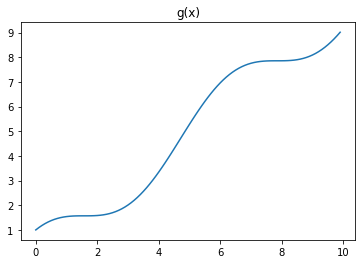

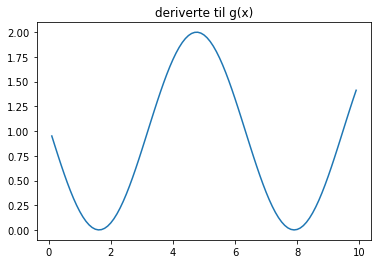

In [18]:
# Definere funksjonen som skal deriveres
def g(x):
    return cos(x)+x 

# Definere størrelsen på tidsintervallet (dt)
dt = 0.1

# Lage arrayer med 'måletidspunkt' og 'målinger'
x_verdier = arange(0, 10, dt)
y_verdier = g(x_verdier)

# Tegne plot av funksjonen
plot(x_verdier, y_verdier)
title('g(x)')
show()

# Bruke numerisk derivasjon til å derivere funksjonen
fart_verdier = deriver(y_verdier, dt)

# Tegne plot av den deriverte
plot(x_verdier[1:], fart_verdier)
title('deriverte til g(x)')
show()

### Oppgave 3 a)
Fyll inn skjelletkoden under slik at den  deriverer funksjonen (du trenger kun endre linje 5)

$$ g(x) = (\sin(x) + 1)^x $$

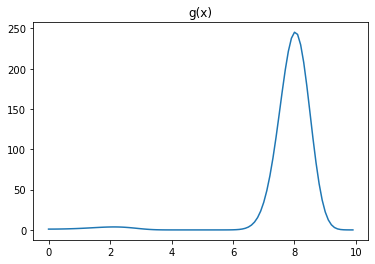

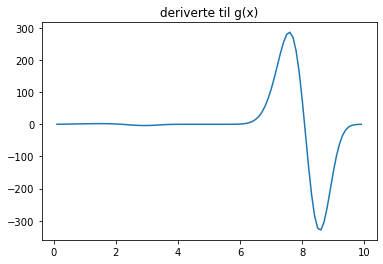

In [19]:
def g(x):
    return (sin(x) + 1)**x

dt = 0.1
x_verdier = arange(0, 10, dt)
y_verdier = g(x_verdier)

# Tegne plot av funksjonen
plot(x_verdier, y_verdier)
title('g(x)')
show()

# Bruke numerisk derivasjon til å derivere funksjonen
fart_verdier = deriver(y_verdier, dt)

# Tegne plot av den deriverte
plot(x_verdier[1:], fart_verdier)
title('deriverte til g(x)')
show()

### Oppgave 3 b)

Skriv kode slik at du deriverer løpedistansefunksjonen:
$$ f(t) =\frac{10}{1 + e^{10 - t}} $$
for verdier $0 \leq t \leq 20$

Lagre den deriverte løpedistansen i en variabel `løpehastighet`

**Hint:** Du kan ta utgangspunkt i koden fra forrige oppgave

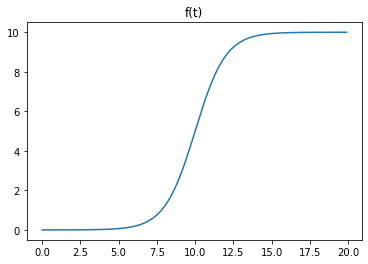

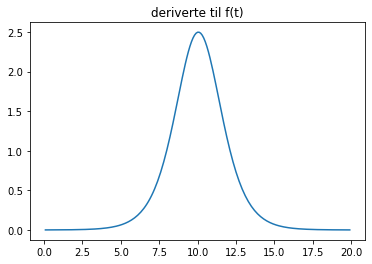

In [20]:
def f(x):
    return 10 / (1 + exp(10 - x))

dt = 0.1
t_verdier = arange(0, 20, dt)
distanser = f(t_verdier)

# Tegne plot av funksjonen
plot(t_verdier, distanser)
title('f(t)')
show()

# Bruke numerisk derivasjon til å derivere funksjonen
løpehastighet = deriver(distanser, dt)

# Tegne plot av den deriverte
plot(t_verdier[1:], løpehastighet)
title('deriverte til f(t)')
show()

### Oppgave 3 c)

Nå skal du derivere løpehastigheten du regnet ut i forrige oppgave. Skriv kode under som deriverer `løpehastighet`-variabelen, lagrer resultatet i en variabel `derivert_løpehastighet` og plotter denne variabelen. Hvilken fysisk tolkning har `derivert_løpehastighet`?

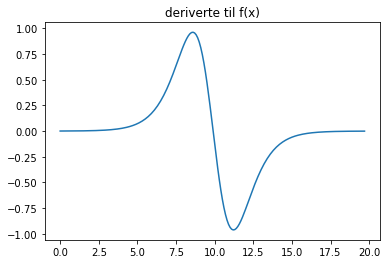

In [21]:
derivert_løpehastighet = deriver(løpehastighet, dt)

# Tegne plot av den deriverte
plot(t_verdier[:-2], derivert_løpehastighet)
title('deriverte til f(x)')
show()

### Oppgave 3 d)

Nå har regnet ut den andrederiverte til løpedistansefunksjonen. Men, det kan jo være nyttig å regne ut den andrederiverte til andre funksjoner og! Lag en funksjon, `andrederiverte(måledistanser, dt)`, som regner ut og returnerer den andrederiverte til en array.

Test funksjonen ved å sammenlikne med resultatet du fikk i oppgave 3c)

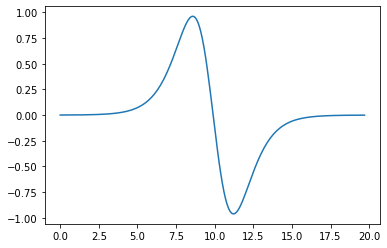

In [22]:
def andrederiverte(måledistanser, dt):
    førstederiverte = deriver(måledistanser, dt)
    return deriver(førstederiverte, dt)

plot(t_verdier[:-2], andrederiverte(distanser, dt))
show()

# Del 3:  Numerisk derivasjon kan vi bruke selv når vi ikke kan løse problemet for hånd. For eksempel hvis vi ikke vet hva funksjonen er

In [23]:
# Her installerer vi distanse_finner pakken som lar oss regne ut hvor langt vi har
# bevegd oss fra GPS data.
!pip install distanse_finner --user

In [24]:
from distanse_finner import last_uniform_data

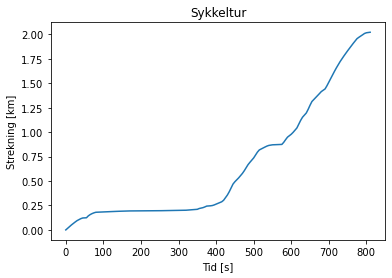

In [25]:
dt_s = 5  # Fem sekund mellom hver måling
tidspunkt_s, avstander_km = last_uniform_data('20200516.csv', dt_s)

plot(tidspunkt_s, avstander_km)
xlabel('Tid [s]')
ylabel('Strekning [km]')
title('Sykkeltur')
show()

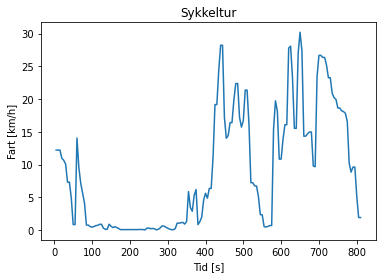

In [26]:
fart = deriver(avstander_km, dt_s) #km/s
fart = fart*3600 # km/h

plot(tidspunkt_s[1:], fart)

xlabel('Tid [s]')
ylabel('Fart [km/h]')
title('Sykkeltur')
show()